## Visualize the selected study area and rgi60 glacier area
#### Region (with buffer): [71, 33, 85, 39]

In [1]:
import os
import warnings
warnings.filterwarnings('ignore')
root_proj = '/Users/luo/Library/CloudStorage/OneDrive-Personal/GitHub/Glacier-in-RGI1305'
os.chdir(root_proj)


In [4]:
import matplotlib.pyplot as plt
from utils.geotif_io import readTiff
from utils.imgShow import imgShow
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io.shapereader import Reader



In [5]:
path_hma_vec = 'data/boundary/hma_bolch2019.gpkg'
path_wkunlun_vec = 'data/boundary/wkunlun.gpkg'
path_karakoram_vec = 'data/boundary/karakoram.gpkg'
path_wkunlun_rgi60 = 'data/rgi60/rgi60_13_wkunlun.gpkg'
path_karakoram_rgi60 = 'data/rgi60/rgi60_14_karakoram.gpkg'


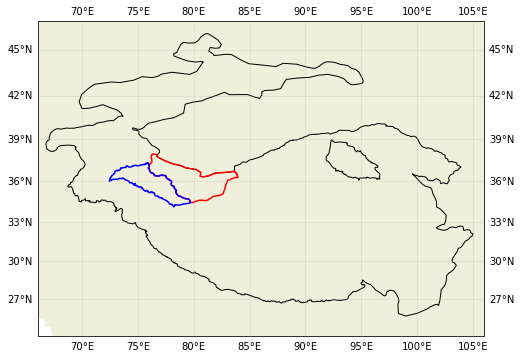

In [6]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mercator(central_longitude=88.5))

ax.set_extent([66, 106, 24.0, 45.0])
ax.add_feature(cfeature.LAND); 
# ax.add_feature(cfeature.LAKES); ax.add_feature(cfeature.RIVERS)
ax.gridlines(draw_labels=True, linewidth=0.5, alpha=0.4, zorder=1)

## 1. tibet boundary
shp_fea = cfeature.ShapelyFeature(Reader(path_hma_vec).geometries(), \
                            crs=ccrs.PlateCarree(), edgecolor='Black', linewidth=1, facecolor='none')
ax.add_feature(shp_fea, zorder=0)

## 2. wkunlun boundary
shp_fea = cfeature.ShapelyFeature(Reader(path_wkunlun_vec).geometries(), \
                            crs=ccrs.PlateCarree(), edgecolor='red', linewidth=1.5, facecolor='none')
ax.add_feature(shp_fea, zorder=0)

## 3. karakoram boundary
shp_fea = cfeature.ShapelyFeature(Reader(path_karakoram_vec).geometries(), \
                            crs=ccrs.PlateCarree(), edgecolor='blue', linewidth=1.5, facecolor='none')
ax.add_feature(shp_fea, zorder=0)


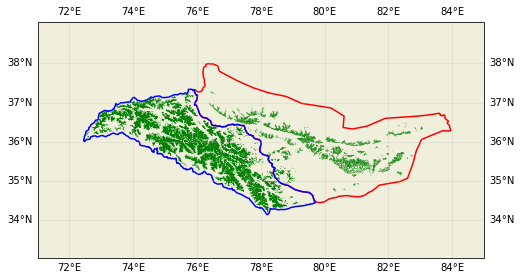

In [7]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mercator())
ax.set_extent([71, 85, 33.0, 39.0])
ax.add_feature(cfeature.LAND); 
ax.gridlines(draw_labels=True, linewidth=0.5, alpha=0.4, zorder=1)

## 1. wkunlun boundary
shp_fea = cfeature.ShapelyFeature(Reader(path_wkunlun_vec).geometries(), \
                      crs=ccrs.PlateCarree(), edgecolor='red', linewidth=1.5, facecolor='none')
ax.add_feature(shp_fea, zorder=0)

## 2. karakoram boundary
shp_fea = cfeature.ShapelyFeature(Reader(path_karakoram_vec).geometries(), \
                      crs=ccrs.PlateCarree(), edgecolor='blue', linewidth=1.5, facecolor='none')
ax.add_feature(shp_fea, zorder=0)

## 3. wkunlun glaciers (rgi60); note: very slow
shp_fea = cfeature.ShapelyFeature(Reader(path_wkunlun_rgi60).geometries(), \
                      crs=ccrs.PlateCarree(), edgecolor='green', linewidth=0.2, facecolor='none')
ax.add_feature(shp_fea, zorder=0)

## 4. karakoram glaciers (rgi60)
shp_fea = cfeature.ShapelyFeature(Reader(path_karakoram_rgi60).geometries(), \
                      crs=ccrs.PlateCarree(), edgecolor='green', linewidth=0.2, facecolor='none')
ax.add_feature(shp_fea, zorder=0)
